<a href="https://colab.research.google.com/github/prosperjohn9/har/blob/main/HumanActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Load dataset
from os import listdir
from pandas import read_csv
from google.colab import drive
from matplotlib import pyplot

# Load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
  subjects = list()
  directory = prefix + '/content/drive/MyDrive/HAR/Activity Recognition from Single Chest-Mounted Accelerometer'
  for name in listdir(directory):
    filename = directory + '/' + name
    if not filename.endswith('.csv'):
      continue
    df = read_csv(filename, header=None)

    # drop row number
    values = df.values[:, 1:]
    subjects.append(values)
  return subjects

# Load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

Loaded 15 subjects


Loaded 15 subjects


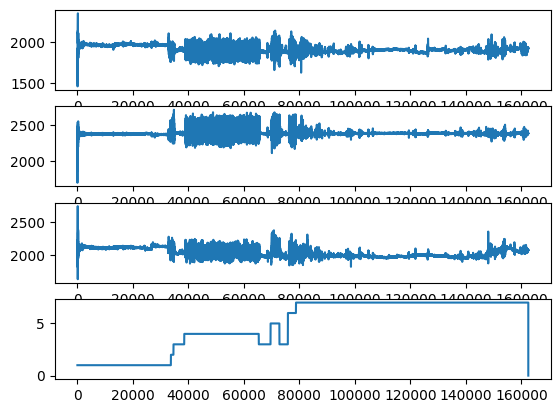

In [10]:
# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
  subjects = list()
  directory = prefix + '/content/drive/MyDrive/HAR/Activity Recognition from Single Chest-Mounted Accelerometer'
  for name in listdir(directory):
    filename = directory + '/' + name
    if not filename.endswith('.csv'):
      continue
    df = read_csv(filename, header=None)

    # drop row number
    values = df.values[:, 1:]
    subjects.append(values)
  return subjects

# plot the x, y, z acceleration and activities for a single subject
def plot_subject(subject):
  pyplot.figure()

  # create a plot for each column
  for col in range(subject.shape[1]):
    pyplot.subplot(subject.shape[1], 1, col+1)
    pyplot.plot(subject[:,col])
  pyplot.show()

# load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

# plot activities for a single subject
plot_subject(subjects[0])

Loaded 15 subjects


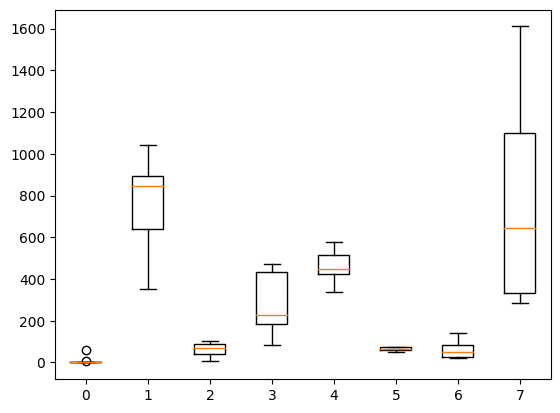

In [11]:
# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
  subjects = list()
  directory = prefix + '/content/drive/MyDrive/HAR/Activity Recognition from Single Chest-Mounted Accelerometer'
  for name in listdir(directory):
    filename = directory + '/' + name
    if not filename.endswith('.csv'):
      continue
    df = read_csv(filename, header=None)

    # drop row number
    values = df.values[:, 1:]
    subjects.append(values)
  return subjects

# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(subjects, activities):
  grouped = [{a:s[s[:,-1]==a] for a in activities} for s in subjects]
  return grouped

# calculate total duration in sec for each activity per subject and plot
def plot_durations(grouped, activities):

  # calculate the lengths for each activity for each subject
  freq = 52
  durations = [[len(s[a])/freq for s in grouped] for a in activities]
  pyplot.boxplot(durations, labels=activities)
  pyplot.show()

# load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

# group traces by activity for each subject
activities = [i for i in range(0,8)]
grouped = group_by_activity(subjects, activities)

# plot durations
plot_durations(grouped, activities)

Loaded 15 subjects


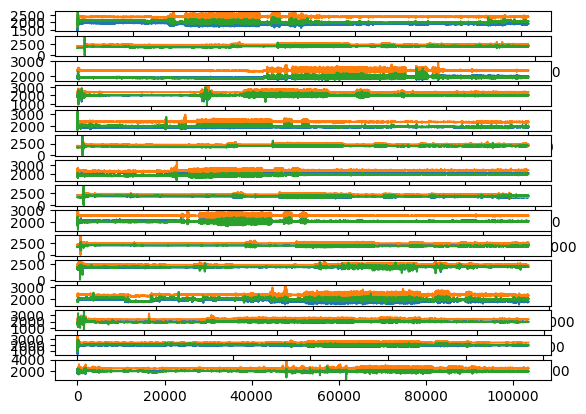

In [12]:
# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
  subjects = list()
  directory = prefix + '/content/drive/MyDrive/HAR/Activity Recognition from Single Chest-Mounted Accelerometer'
  for name in listdir(directory):
    filename = directory + '/' + name
    if not filename.endswith('.csv'):
      continue
    df = read_csv(filename, header=None)

    # drop row number
    values = df.values[:, 1:]
    subjects.append(values)
  return subjects

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
  pyplot.figure()

  # create a plot for each subject
  for i in range(len(subjects)):
    pyplot.subplot(len(subjects), 1, i+1)

    # plot each of x, y and z
    for j in range(subjects[i].shape[1]-1):
      pyplot.plot(subjects[i][:,j])
  pyplot.show()

# load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

# plot trace data for each subject
plot_subjects(subjects)

Loaded 15 subjects


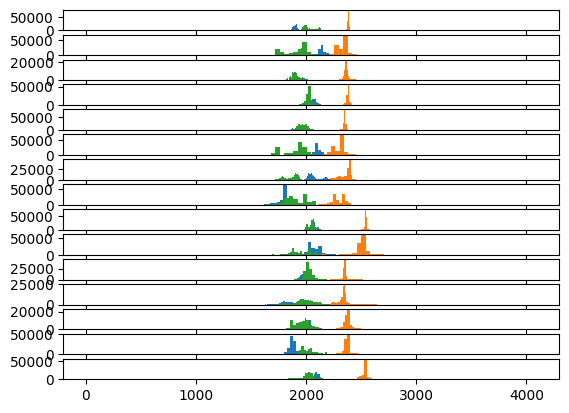

In [13]:
# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
  subjects = list()
  directory = prefix + '/content/drive/MyDrive/HAR/Activity Recognition from Single Chest-Mounted Accelerometer'
  for name in listdir(directory):
    filename = directory + '/' + name
    if not filename.endswith('.csv'):
      continue
    df = read_csv(filename, header=None)

    # drop row number
    values = df.values[:, 1:]
    subjects.append(values)
  return subjects

# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
  pyplot.figure()

  # create a plot for each subject
  xaxis = None
  for i in range(len(subjects)):
    ax = pyplot.subplot(len(subjects), 1, i+1, sharex=xaxis)
    if i == 0:
      xaxis = ax

    # plot a histogram of x data
    for j in range(subjects[i].shape[1]-1):
      pyplot.hist(subjects[i][:,j], bins=100)
  pyplot.show()

# load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

# plot trace data for each subject
plot_subjects(subjects)

Adding CNN plus LSTM and using LOOCV